# Objective: EDA with new unseen Data

## Food Order dataset from Kaggle

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Load and Analyze Data
data = pd.read_csv('food_orders_new_delhi.csv')
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [87]:
# Check Column Types
for col in data:
    print(col, type(data[col][0]))

Order ID <class 'numpy.int64'>
Customer ID <class 'str'>
Restaurant ID <class 'str'>
Order Date and Time <class 'str'>
Delivery Date and Time <class 'str'>
Order Value <class 'numpy.int64'>
Delivery Fee <class 'numpy.int64'>
Payment Method <class 'str'>
Discounts and Offers <class 'str'>
Commission Fee <class 'numpy.int64'>
Payment Processing Fee <class 'numpy.int64'>
Refunds/Chargebacks <class 'numpy.int64'>


In [88]:
# Check Unique Values for Categorical Data
print('Payment Method', data['Payment Method'].unique())
print('----')
print('Discounts and Offers', data['Discounts and Offers'].unique())

Payment Method ['Credit Card' 'Digital Wallet' 'Cash on Delivery']
----
Discounts and Offers ['5% on App' '10%' '15% New User' nan '50 off Promo']


In [89]:
# Check counts for each unique value above
print('Cash on Delivery | ', len(data[data['Payment Method'] == 'Cash on Delivery']))
print('Digital Wallet | ', len(data[data['Payment Method'] == 'Digital Wallet']))
print('Credit Card | ', len(data[data['Payment Method'] == 'Credit Card']))
print('-------')
print('10% | ', len(data[data['Discounts and Offers'] == '10%']))
print('50 off Promo | ', len(data[data['Discounts and Offers'] == '50 off Promo']))
print('5% on App | ', len(data[data['Discounts and Offers'] == '5% on App']))
print('nan | ', len(data[data['Discounts and Offers'].isna()]))
print('15% New User | ', len(data[data['Discounts and Offers'] == '15% New User']))

Cash on Delivery |  357
Digital Wallet |  306
Credit Card |  337
-------
10% |  233
50 off Promo |  201
5% on App |  183
nan |  185
15% New User |  198


In [90]:
# Change NaN to 'None' for Discounts
data = data.replace(np.nan, 'None')

In [91]:
# Check for NaN Values
data[data.isna().any(axis=1)]

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks


In [92]:
# Separate Date and Time for more Flexibility
def date_extract(date_time):
    return date_time.split()[0]

def time_extract(date_time):
    return date_time.split()[1]
    
data['Order Date'] = data['Order Date and Time'].apply(lambda x: date_extract(x))
data['Order Time']  = data['Order Date and Time'].apply(lambda x: time_extract(x))

data['Delivery Date'] = data['Delivery Date and Time'].apply(lambda x: date_extract(x))
data['Delivery Time']  = data['Delivery Date and Time'].apply(lambda x: time_extract(x))

In [93]:
# Drop Redundant columns
data.drop(labels=['Order Date and Time','Delivery Date and Time'], inplace=True, axis=1)

In [94]:
# Make data more granular w.r.t. Date/Time
data['Order Year'] = data['Order Date'].apply(lambda x: x[0:4])
data['Order Month'] = data['Order Date'].apply(lambda x: x[5:7])
data['Order Day'] = data['Order Date'].apply(lambda x: x[8:10])

data['Delivery Year'] = data['Delivery Date'].apply(lambda x: x[0:4])
data['Delivery Month'] = data['Delivery Date'].apply(lambda x: x[5:7])
data['Delivery Day'] = data['Delivery Date'].apply(lambda x: x[8:10])

if len(data['Order Year'].unique()) == 1:
    data.drop(labels=['Order Year', 'Delivery Year'], inplace=True, axis=1)

data['Order Hour'] = data['Order Time'].apply(lambda x: x[0:2])
data['Order Minute'] = data['Order Time'].apply(lambda x: x[3:5])
data['Order MS'] = data['Order Time'].apply(lambda x: x[6:8])

data['Delivery Hour'] = data['Delivery Time'].apply(lambda x: x[0:2])
data['Delivery Minute'] = data['Delivery Time'].apply(lambda x: x[3:5])
data['Delivery MS'] = data['Delivery Time'].apply(lambda x: x[6:8])

data.drop(['Delivery Time', 'Delivery Date', 'Order Time', 'Order Date'], inplace=True, axis=1)

### Basic Exploration for Payment Method Variations


In [96]:
# Data subset assignment
cod = data[data['Payment Method'] == 'Cash on Delivery']
dw = data[data['Payment Method'] == 'Digital Wallet']
cc = data[data['Payment Method'] == 'Credit Card']

In [127]:
def bar_compare(value, col):
    plt.figure(figsize=(15, 10))
    labels = ['CoD', 'DW', 'CC']
    colors = ['tab:red', 'tab:blue', 'tab:green']
    i = 0
    for col in data.describe():
        i += 1
        vals = [cod.describe()[col][value], dw.describe()[col][value], cc.describe()[col][value]]
        plt.subplot(2,3,i)
        plt.bar(labels, vals, color=colors)
        plt.title(col)

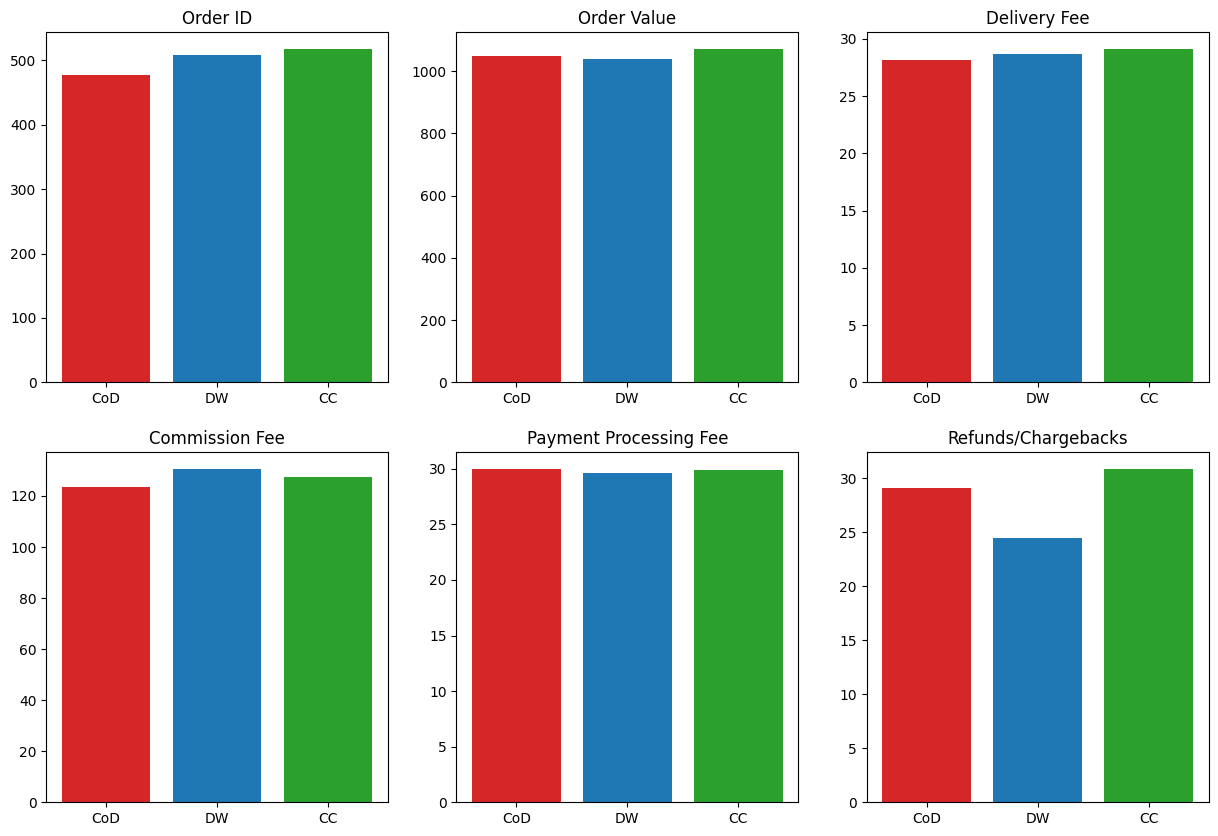

In [128]:
bar_compare('mean', 'Order Value')

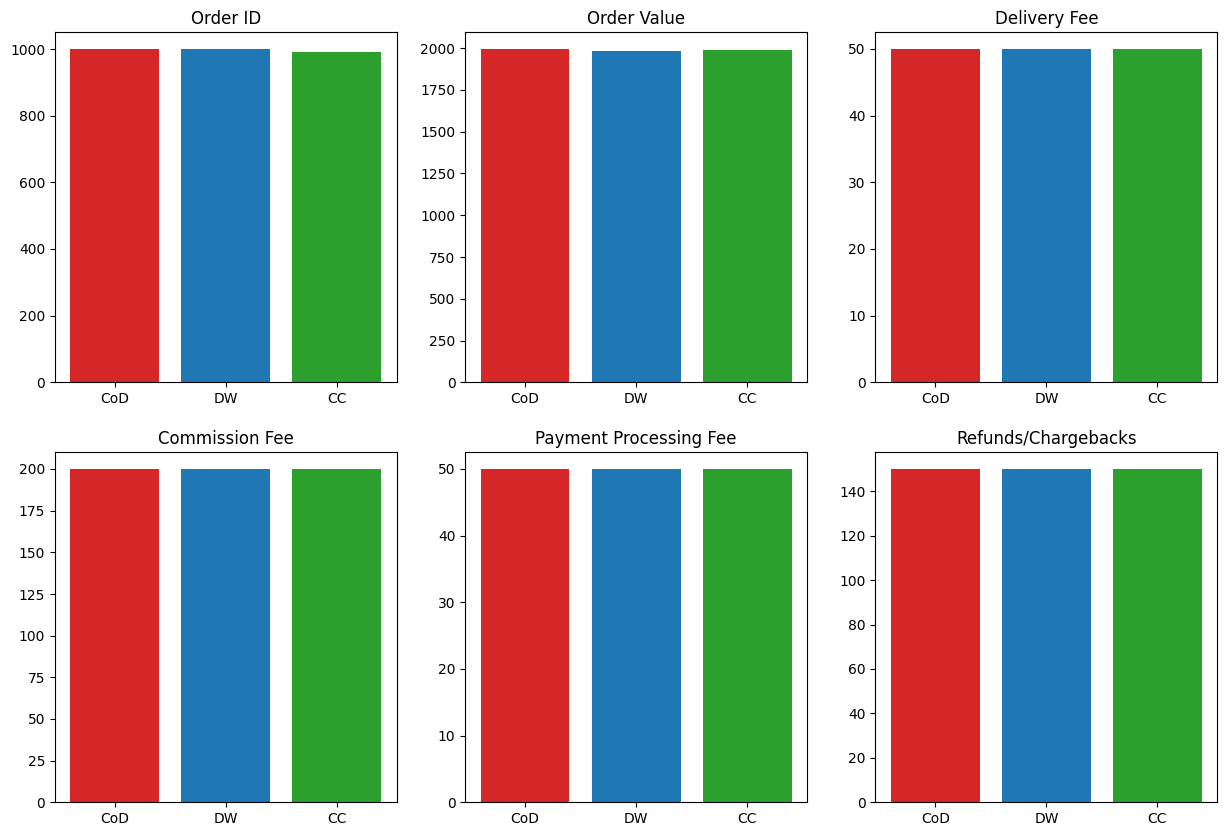

In [126]:
# Max Comparison



In [98]:
plt.hist(cod.describe[''])

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,477.487395,1049.492997,28.151261,123.585434,29.983193,29.131653
std,279.179774,540.857822,17.073851,42.164227,11.512316,50.615060
min,3.000000,104.000000,0.000000,50.000000,10.000000,0.000000
25%,245.000000,559.000000,20.000000,86.000000,21.000000,0.000000
50%,482.000000,1024.000000,30.000000,123.000000,30.000000,0.000000
75%,705.000000,1511.000000,40.000000,159.000000,40.000000,50.000000
max,999.000000,1995.000000,50.000000,200.000000,50.000000,150.000000


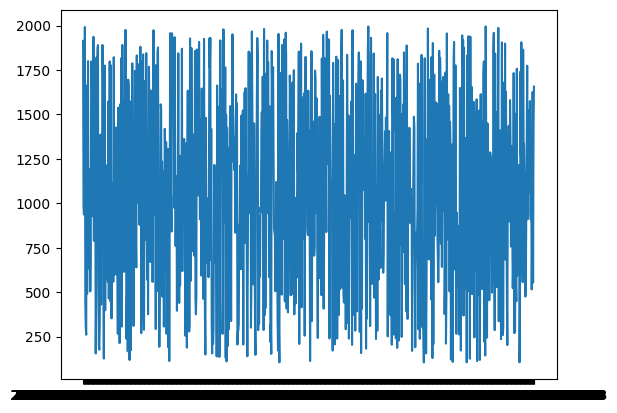

In [17]:
plt.plot(data['Delivery Date and Time'], data['Order Value'])

In [22]:
data = data.sort_values(by='Delivery Date and Time')

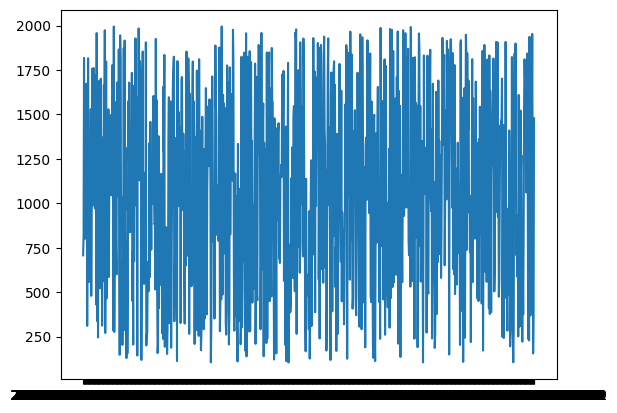

In [23]:
plt.plot(data['Delivery Date and Time'], data['Order Value'])